In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

In [22]:
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [24]:
df = df.drop('Unnamed: 0', axis=1)

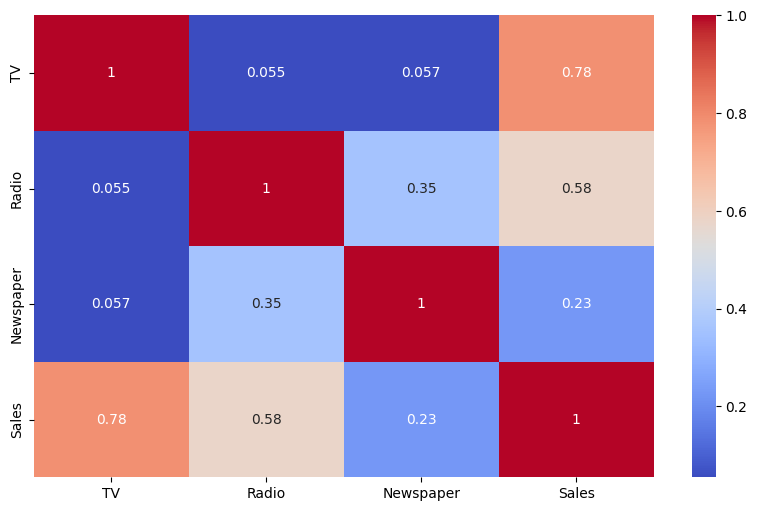

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [26]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [27]:
X_train, X_Other, y_train, y_Other = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_val, X_test, y_val, y_test = train_test_split(X_Other, y_Other, test_size=0.5, random_state=42)

In [10]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# X_val_scaled = scaler.transform(X_val)

In [29]:
from sklearn.preprocessing import MinMaxScaler
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)
X_val_scaled = MinMaxScaler().fit_transform(X_val)

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train_scaled.shape[1:], name = 'Input_layer'),
    keras.layers.Dense(64, activation='relu', name = 'Hidden_layer_1'),
    keras.layers.Dense(32, activation='relu', name = 'Hidden_layer_2'),
    keras.layers.Dense(1, activation='linear', name = 'Output_layer')
])

In [32]:
from keras.optimizers import Adam

In [33]:
model.compile(loss='mse',optimizer=Adam(learning_rate=1e-3), metrics=['RootMeanSquaredError'])

In [34]:
history = model.fit(X_train_scaled, y_train, batch_size=32,epochs=50, validation_data=(X_val_scaled, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - RootMeanSquaredError: 14.7053 - loss: 216.4814 - val_RootMeanSquaredError: 14.6048 - val_loss: 213.3001
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - RootMeanSquaredError: 14.5710 - loss: 212.5434 - val_RootMeanSquaredError: 14.4710 - val_loss: 209.4108
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - RootMeanSquaredError: 14.4382 - loss: 208.6874 - val_RootMeanSquaredError: 14.3323 - val_loss: 205.4145
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - RootMeanSquaredError: 14.3014 - loss: 204.7491 - val_RootMeanSquaredError: 14.1859 - val_loss: 201.2388
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - RootMeanSquaredError: 14.1533 - loss: 200.5309 - val_RootMeanSquaredError: 14.0252 - val_loss: 196.7056
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - RootMeanSquaredError: 13.9860 - loss: 195.8147 - val_RootMeanSquaredError: 13.8359 - val_loss: 191.4324
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - RootMeanSquaredErro

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_layer_1 (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,109 (27.77 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,740 (18.52 KB)

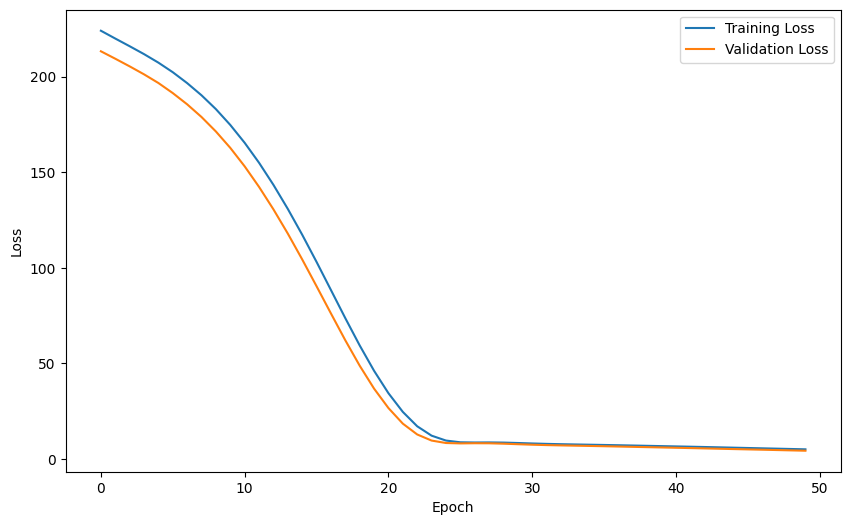

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
loss, mse = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test MSE: {mse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - RootMeanSquaredError: 3.2107 - loss: 10.3084
Test Loss: 10.308378219604492
Test MSE: 3.2106664180755615


In [38]:
y_pred = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [43]:
print(f'Actual: {y_test[:5]}')
print(f'Predicted: {y_pred[:5]}')

Actual: 68     18.9
56      5.5
177    11.7
84     21.7
128    24.7
Name: Sales, dtype: float64
Predicted: [[17.116158]
 [10.813008]
 [13.768872]
 [19.55058 ]
 [18.644249]]
